# TED Talk Transcript Recommender System
AIT-526-004 Final Project Working System

This notebook creates a recommender function used within a while loop. The user can enter the title of a TED Talk and get recommended 5 similar Talks. The purpose of this system is to improve user satisfaction when selecting a TED Talk to watch and increasing user engagement on the TEDTalk.com website. 

In [1]:
#importing packages

import pandas as pd
import numpy as np
import nltk
import string
import re

C:\Users\rebec\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
import os

os.getcwd()
#os.chdir('AIT526')

'C:\\Users\\rebec'

In [3]:
os.getcwd()

'C:\\Users\\rebec'

In [4]:
#import data
df = pd.read_csv('ted_talks_en.csv')
##df.head()

C:\Users\rebec\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266

Looks like there are way too many columns being brought in. Let's remove all the columns that start with "Unnamed"

In [5]:
df2 = df.loc[:, ~df.columns.str.startswith('Unnamed')]

Great! Now let's narrow down the columns to the string/text based columns

In [6]:
#df2.columns

In [7]:
'''df = df2[['talk_id', 
          'title', 
          'speaker_1', 
          'occupations',
          'about_speakers',
          'topics', 
          'related_talks',
          'description',
          'transcript']]'''
# I think we should remove related talks - Delena
df = df2[['talk_id', 
          'title', 
          'speaker_1', 
          'occupations',
          'about_speakers',
          'topics',
          'description',
          'transcript']]
df.head()


,talk_id,title,speaker_1,occupations,about_speakers,topics,description,transcript
0,1,Averting the climate crisis,Al Gore,{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,"['alternative energy', 'cars', 'climate change...",With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre..."
1,92,The best stats you've ever seen,Hans Rosling,{0: ['global health expert; data visionary']},"{0: 'In Hans Rosling’s hands, data sings. Glob...","['Africa', 'Asia', 'Google', 'demo', 'economic...",You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac..."
2,7,Simplicity sells,David Pogue,{0: ['technology columnist']},{0: 'David Pogue is the personal technology co...,"['computers', 'entertainment', 'interface desi...",New York Times columnist David Pogue takes aim...,"(Music: ""The Sound of Silence,"" Simon & Garfun..."
3,53,Greening the ghetto,Majora Carter,{0: ['activist for environmental justice']},{0: 'Majora Carter redefined the field of envi...,"['MacArthur grant', 'activism', 'business', 'c...","In an emotionally charged talk, MacArthur-winn...",If you're here today — and I'm very happy that...
4,66,Do schools kill creativity?,Sir Ken Robinson,"{0: ['author', 'educator']}","{0: ""Creativity expert Sir Ken Robinson challe...","['children', 'creativity', 'culture', 'dance',...",Sir Ken Robinson makes an entertaining and pro...,Good morning. How are you? (Audience) Good. It...


In [8]:
#df.set_index('talk_id') #not sure if this is needed

Next thing need to do is remove the brackets and leading numbers that are present in some of these columns.
For example, occupations has {0: ['climate advocate']} instead of just 'climate advocate'

In [9]:
#looking at the data types
df.dtypes

talk_id           object
title             object
speaker_1         object
occupations       object
about_speakers    object
topics            object
description       object
transcript        object
dtype: object

In [10]:
#I want to make everything a string, even the ID
df = df.astype('string')

In [11]:
import ast

def str2dict(x):
    if type(x) is str and x[0] == "{":
        return(ast.literal_eval(x))
    else:
        return(x)

def speaker1(x):
    if type(x) is dict:
        return(x[0])
    else:
        return(x)

def list2str(x):
    if type(x) is list:
        value = ""
        for items in x:
            if value == "":
                value = str(items)
            else:
                value = value + ", " + str(items)
        return(value)
    else:
        return(x)

In [12]:
# Clean up "occupations" column
df['occupations'] = df['occupations'].apply(lambda x: str2dict(x))
df['occupations'] = df['occupations'].apply(lambda x: speaker1(x))
df['occupations'] = df['occupations'].apply(lambda x: list2str(x))
df['occupations'] = df['occupations'].apply(lambda x: str(x))
df['occupations'] = df['occupations'].apply(lambda x: x.replace(";",","))

df.head()

,talk_id,title,speaker_1,occupations,about_speakers,topics,description,transcript
0,1,Averting the climate crisis,Al Gore,climate advocate,{0: 'Nobel Laureate Al Gore focused the world’...,"['alternative energy', 'cars', 'climate change...",With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre..."
1,92,The best stats you've ever seen,Hans Rosling,"global health expert, data visionary","{0: 'In Hans Rosling’s hands, data sings. Glob...","['Africa', 'Asia', 'Google', 'demo', 'economic...",You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac..."
2,7,Simplicity sells,David Pogue,technology columnist,{0: 'David Pogue is the personal technology co...,"['computers', 'entertainment', 'interface desi...",New York Times columnist David Pogue takes aim...,"(Music: ""The Sound of Silence,"" Simon & Garfun..."
3,53,Greening the ghetto,Majora Carter,activist for environmental justice,{0: 'Majora Carter redefined the field of envi...,"['MacArthur grant', 'activism', 'business', 'c...","In an emotionally charged talk, MacArthur-winn...",If you're here today — and I'm very happy that...
4,66,Do schools kill creativity?,Sir Ken Robinson,"author, educator","{0: ""Creativity expert Sir Ken Robinson challe...","['children', 'creativity', 'culture', 'dance',...",Sir Ken Robinson makes an entertaining and pro...,Good morning. How are you? (Audience) Good. It...


In [13]:
# Clean up "about_speakers" column
df['about_speakers'] = df['about_speakers'].apply(lambda x: str2dict(x))
df['about_speakers'] = df['about_speakers'].apply(lambda x: speaker1(x))
df['about_speakers'] = df['about_speakers'].apply(lambda x: str(x))
df = df.rename(columns={"about_speakers": "about_speaker"})

df.head()

,talk_id,title,speaker_1,occupations,about_speaker,topics,description,transcript
0,1,Averting the climate crisis,Al Gore,climate advocate,Nobel Laureate Al Gore focused the world’s att...,"['alternative energy', 'cars', 'climate change...",With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre..."
1,92,The best stats you've ever seen,Hans Rosling,"global health expert, data visionary","In Hans Rosling’s hands, data sings. Global tr...","['Africa', 'Asia', 'Google', 'demo', 'economic...",You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac..."
2,7,Simplicity sells,David Pogue,technology columnist,David Pogue is the personal technology columni...,"['computers', 'entertainment', 'interface desi...",New York Times columnist David Pogue takes aim...,"(Music: ""The Sound of Silence,"" Simon & Garfun..."
3,53,Greening the ghetto,Majora Carter,activist for environmental justice,Majora Carter redefined the field of environme...,"['MacArthur grant', 'activism', 'business', 'c...","In an emotionally charged talk, MacArthur-winn...",If you're here today — and I'm very happy that...
4,66,Do schools kill creativity?,Sir Ken Robinson,"author, educator",Creativity expert Sir Ken Robinson challenges ...,"['children', 'creativity', 'culture', 'dance',...",Sir Ken Robinson makes an entertaining and pro...,Good morning. How are you? (Audience) Good. It...


In [14]:
# Clean up "topics" column
df['topics'] = df['topics'].apply(lambda x: str(x))
df['topics'] = df['topics'].apply(lambda x: x.replace("'",""))
df['topics'] = df['topics'].apply(lambda x: x.replace("[",""))
df['topics'] = df['topics'].apply(lambda x: x.replace("]",""))

df.head()

,talk_id,title,speaker_1,occupations,about_speaker,topics,description,transcript
0,1,Averting the climate crisis,Al Gore,climate advocate,Nobel Laureate Al Gore focused the world’s att...,"alternative energy, cars, climate change, cult...",With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre..."
1,92,The best stats you've ever seen,Hans Rosling,"global health expert, data visionary","In Hans Rosling’s hands, data sings. Global tr...","Africa, Asia, Google, demo, economics, global ...",You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac..."
2,7,Simplicity sells,David Pogue,technology columnist,David Pogue is the personal technology columni...,"computers, entertainment, interface design, me...",New York Times columnist David Pogue takes aim...,"(Music: ""The Sound of Silence,"" Simon & Garfun..."
3,53,Greening the ghetto,Majora Carter,activist for environmental justice,Majora Carter redefined the field of environme...,"MacArthur grant, activism, business, cities, e...","In an emotionally charged talk, MacArthur-winn...",If you're here today — and I'm very happy that...
4,66,Do schools kill creativity?,Sir Ken Robinson,"author, educator",Creativity expert Sir Ken Robinson challenges ...,"children, creativity, culture, dance, educatio...",Sir Ken Robinson makes an entertaining and pro...,Good morning. How are you? (Audience) Good. It...


In [15]:
# Export new dataset
df.to_csv("ted_talks_clean.csv", index=False)

In [16]:
#remove the leading and trailing brackets by removing all punctuation. We will need to do this anyway as a part of NLP tokenization.
def remove_punctuation(text):
    for i in string.punctuation:
        text = text.replace(i, '')
    return text

In [17]:
#In every column let's remove the punctuations and all numbers from the string. (Should we only remove leading numbers?)
'''for i in df.columns:
    df[i] = df[i].apply(remove_punctuation)
    df[i] = df[i].str.replace('\d+', '')'''

"for i in df.columns:\n    df[i] = df[i].apply(remove_punctuation)\n    df[i] = df[i].str.replace('\\d+', '')"

Now we can start NLP Analysis and creating a TF-IDF Vectorization!

In [18]:
#basing code off of video: https://youtu.be/ijtxuF_5kEU?si=_QzVMTDKyx5XZgls

#uses combo of TF-IDF Vectorization and Cosine Similarity

In [19]:
#import package that create a term frequency matrix

from sklearn.feature_extraction.text import TfidfVectorizer

In [20]:
#creating vectorizer and removing stop words

tfidf = TfidfVectorizer(stop_words = 'english')

In [21]:
#we want to recommend a talk based on the term frequency in the transcript of the talk. 
#Clean up this column by replacing nulls with blank 

df['transcript'] = df['transcript'].fillna("")


In [22]:
tfidf_matrix = tfidf.fit_transform(df['transcript'])


In [23]:
#take a look at our term frequency matrix, would like to show words instead of numbers
df_matrix = pd.DataFrame.sparse.from_spmatrix(tfidf_matrix)
df_matrix

,0,1,2,3,4,5,6,7,8,9,...,68185,68186,68187,68188,68189,68190,68191,68192,68193,68194
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.008217,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.008101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.032468,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4011,0.0,0.037753,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4012,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4013,0.0,0.022456,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4014,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Cosine Simiarity

In [24]:
#we will be using the TF-IDF matrix to calculate 

from sklearn.metrics.pairwise import linear_kernel

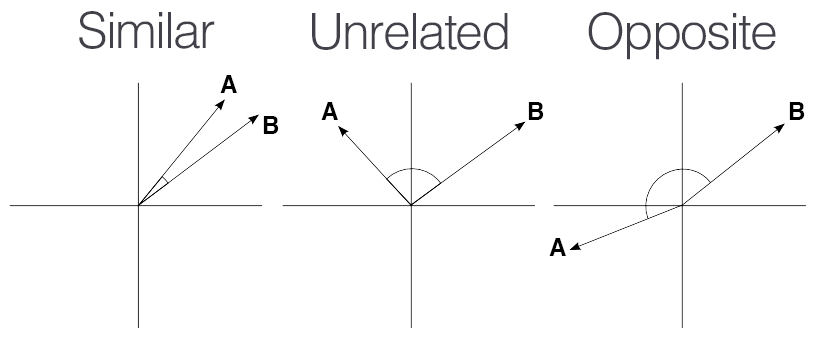

In [25]:
import IPython.display
from IPython.display import Image

Image("C:\\Users\\rebec\\AIT526\\Final Project - TED Talks\\cosine_sim_pic.png")

In [26]:
#calculating a cosine similarity to see how similar or different the words in a talk are to another talk
#maybe insert a visaul example of a cosine similarity with a graph, like a picture from google. 

cos_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [27]:
#Each talk now has a cosine similarity score with every other talk. 

cos_sim


array([[1.00000000e+00, 1.08577857e-01, 1.69570169e-01, ...,
        4.09836576e-02, 2.28169298e-02, 1.08955673e-02],
       [1.08577857e-01, 1.00000000e+00, 1.22346882e-01, ...,
        3.95979656e-02, 2.52429047e-02, 1.13205942e-02],
       [1.69570169e-01, 1.22346882e-01, 1.00000000e+00, ...,
        3.94017055e-02, 4.23922000e-02, 1.64237828e-02],
       ...,
       [4.09836576e-02, 3.95979656e-02, 3.94017055e-02, ...,
        1.00000000e+00, 1.58350800e-02, 5.14234392e-03],
       [2.28169298e-02, 2.52429047e-02, 4.23922000e-02, ...,
        1.58350800e-02, 1.00000000e+00, 8.64264332e-04],
       [1.08955673e-02, 1.13205942e-02, 1.64237828e-02, ...,
        5.14234392e-03, 8.64264332e-04, 1.00000000e+00]])

In [28]:
title_indices= pd.Series(df.index, index = df['title'])


In [29]:
#creating function that recommends talks

def get_recommend(title, cos_sim = cos_sim):
    my_index = title_indices[title]
    similarity_scores = enumerate(cos_sim[my_index])
    similarity_scores = sorted(similarity_scores, key = lambda x: x[1], reverse = True) #ordering the scores to get the top 10
    similarity_scores = similarity_scores[1:6]  #don't need the 0th score because that will be 1 or the talk we're looking at
    sim_index = [i[0] for i in similarity_scores]
    print(df['title'].iloc[sim_index])
#    return "I'm sorry. I don't understand what you're saying"

In [31]:
#Create the main loop to start recommender system
print("Welcome to the TED Talk Recommender System, made by Rebecca for AIT526-004. Enter a TED Talk to get new Recommendations")
while True:
    user_input = input("User: ")
    if user_input == "bye":
        print("Goodbye.")
        break
    else:
        print(get_recommend(user_input))

Welcome to the TED Talk Recommender System, made by Rebecca for AIT526-004. Enter a TED Talk to get new Recommendations
User: Averting the climate crisis
209                    New thinking on the climate crisis
556                                A one-man world summit
2402           A climate solution where all sides can win
364                                  Design and discovery
2558    Can we stop climate change by removing CO2 fro...
Name: title, dtype: string
None
User: Do schools kill creativity?
1452               How to escape education's death valley
661                     Bring on the learning revolution!
556                                A one-man world summit
20                                        Nerdcore comedy
1998    How I stopped the Taliban from shutting down m...
Name: title, dtype: string
None
User: bye
Goodbye.


In [ ]:
get_recommend('Averting the climate crisis')

In [ ]:
#this is where I thought the "related talks" column could come in. compare them to our recommendations

#df.loc[df['title'] == 'Averting the climate crisis', ['related_talks']]

In [33]:
gk = df['title'].iloc[sim_index]
gk

NameError: name 'sim_index' is not defined